In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import pylab
import seaborn as sns

pd.set_option('future.no_silent_downcasting', True)
df = pd.read_csv ('C://Users/Aaminah/Desktop/masters/d207/churn_clean.csv')

df.describe()
#data = pd.read_csv ('C://Users/Aaminah/Desktop/masters/d207/churn_clean.csv', index_col='Multiple')

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,...,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,...,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,601.000000,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,...,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,26292.500000,35.341828,-97.082812,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,...,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,...,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,...,200.734725,5586.141370,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,...,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [2]:
df.fillna({'InternetService': "None"}, inplace = True)

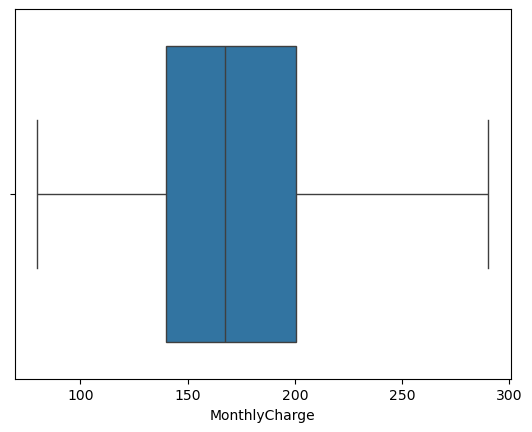

In [3]:
boxplot = sns.boxplot(x='MonthlyCharge', data=df)

In [4]:
df['Multiple_numeric'] = df['Multiple']
dict_multiple = {"Multiple_numeric": {"No": 0, "Yes": 1}}

In [5]:
df = df.replace(dict_multiple)
df["Multiple_numeric"]= df["Multiple_numeric"].astype(float)

In [6]:
df['Multiple_numeric'].unique()

array([0., 1.])

In [7]:
#df.to_csv('C://Users/Aaminah/Desktop/masters/D207/verycleanchurn.csv', index=False)

In [8]:
newdata = pd.read_csv ('C://Users/Aaminah/Desktop/masters/D207/verycleanchurn.csv', index_col='Multiple_numeric')
df = pd.read_csv ('C://Users/Aaminah/Desktop/masters/D207/verycleanchurn.csv')

In [9]:
#(Sewell, 2024)
#create variables for t-test
first = newdata.loc[[1], ['MonthlyCharge']]
second = newdata.loc[[0], ['MonthlyCharge']]
stats.ttest_ind(first, second, equal_var = False)

t_statistic, p_value = stats.ttest_ind(first, second, equal_var=False)
print('This is the t-statistic: ', t_statistic, 'And this is the p-value: ', p_value)

This is the t-statistic:  [41.85164028] And this is the p-value:  [0.]


In [10]:
from statsmodels.stats.weightstats import ztest as ztest
ztest(first, second, value=0)

(array([41.83601299]), array([0.]))

In [11]:
#checking univariate statistics of Yes values in the Multiple column
first.describe()

,MonthlyCharge
count,4608.000000
mean,190.553730
std,39.515468
min,112.484375
25%,160.001300
50%,182.476200
75%,217.484000
max,290.160419


In [12]:
#checking univariate statistics of No values in the Multiple column
second.describe()

,MonthlyCharge
count,5392.000000
mean,157.302777
std,39.704136
min,79.978860
25%,127.482000
50%,149.962100
75%,184.967000
max,257.654900


,Income
count,10000.000000
mean,39806.926771
std,28199.916702
min,348.670000
25%,19224.717500
50%,33170.605000
75%,53246.170000
max,258900.700000


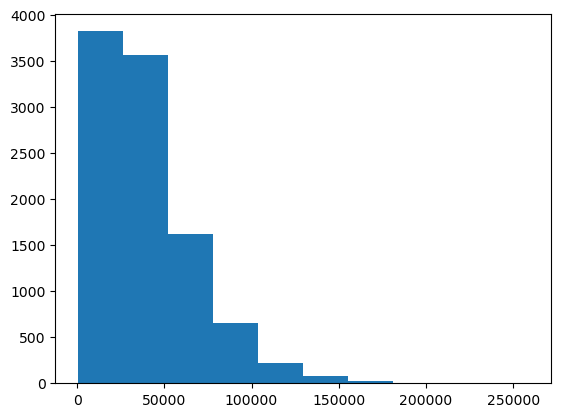

In [13]:
#histogram of Income
plt.hist(df['Income'])
df[['Income']].describe()

,Tenure
count,10000.000000
mean,34.526188
std,26.443063
min,1.000259
25%,7.917694
50%,35.430507
75%,61.479795
max,71.999280


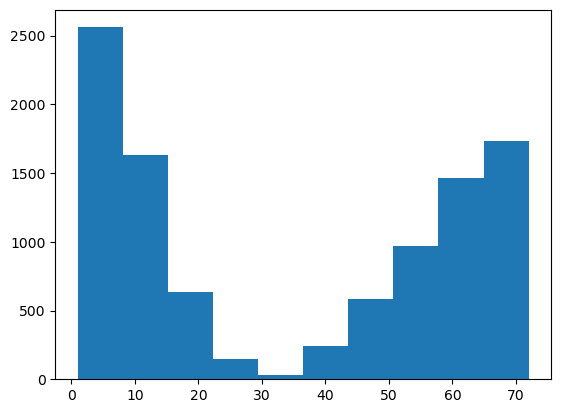

In [14]:
#histogram of Tenure
plt.hist(df['Tenure'])
df[['Tenure']].describe()

Techie
No        8321
Yes       1679
Name: count, dtype: int64

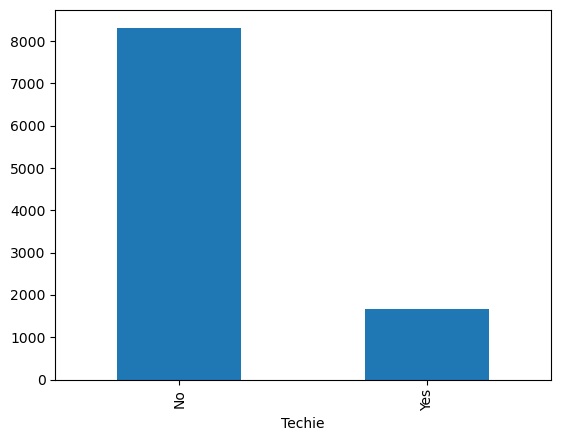

In [15]:
#histogram of Techie
df['Techie'].value_counts(dropna=False).plot(kind='bar')
df[['Techie']].value_counts(dropna=False)

Contract      
Month-to-month    5456
Two Year          2442
One year          2102
Name: count, dtype: int64

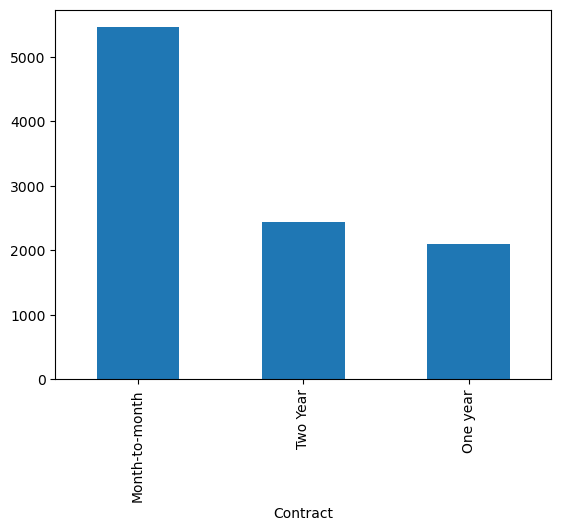

In [16]:
#histogram of Contract
df['Contract'].value_counts(dropna=False).plot(kind='bar')
df[['Contract']].value_counts(dropna=False)

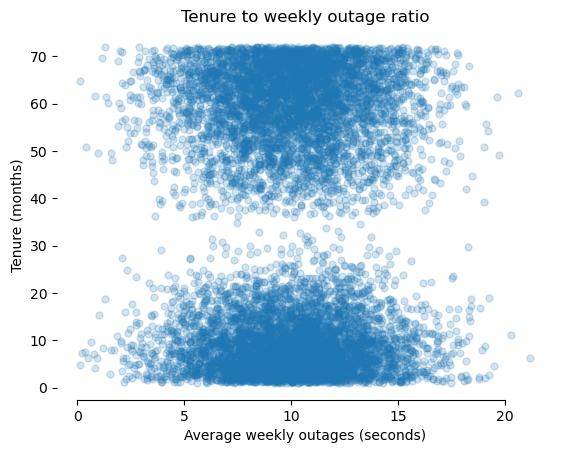

In [17]:
#(Snehashish, 2023)
# Plot scatterplot of tenure x outage_sec_perweek
plt.scatter(data=df, x='Outage_sec_perweek', y='Tenure', 
            alpha=0.2, s=25)
#plt.xlim(xmin=0, xmax = 1)

# Labels & Title
plt.ylabel('Tenure (months)')
plt.xlabel('Average weekly outages (seconds)')
plt.title('Tenure to weekly outage ratio')

# Remove border box
sns.despine(trim=True, left=True);

In [18]:
#creating variable Moredata to divide genders by churn results
moredata = (df
            .groupby("Gender")["Churn"]
            .value_counts(normalize=True)
            .mul(100)
            .round(20)
            .unstack(1))
moredata

Churn,No,Yes
Gender,,
Female,74.686567,25.313433
Male,72.196459,27.803541
Nonbinary,74.458874,25.541126


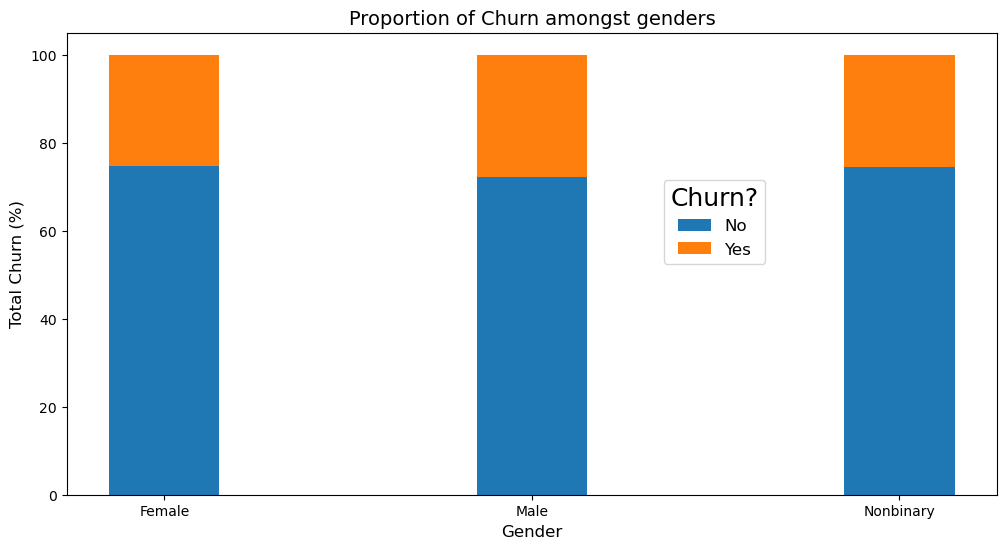

In [19]:
#(Raoniar, 2022)
#Creating stacked barchart for churn x gender
fig, ax = plt.subplots(figsize = (12,6))
ax.bar(moredata.index, moredata["No"], label = "No", width = 0.3) 
ax.bar(moredata.index, moredata["Yes"], bottom = moredata.No, label = "Yes", width = 0.3)
ax.set_ylabel("Total Churn (%)", size = 12)
ax.set_xlabel("Gender", size = 12)
ax.set_title("Proportion of Churn amongst genders", size = 14)
#legend for barchart
ax.legend(labels = ["No", "Yes"],
          fontsize = 12,
          title = "Churn?",
          title_fontsize = 18,
          bbox_to_anchor = [0.76, 0.7])